## `Latar Belakang`

Sebuah perusahaan yang bergerak dibidang **Store Retailer** ingin melakukan suatu promosi untuk pelanggannya. Tetapi perusahaan masih kesulitan dalam menentukan pelanggan mana yang seharusnya promosi tersebut, sehingga perusahaan meminta tim _Data Analyst_ untuk mengecek pelanggan mana yang berpotensi menerima promosi tersebut. Hal ini dimaksudkan agar promosi tepat sasaran.

## `Problem Statement`
Seperti yang telah disebutkan diatas, perusahaan ingin mengetahui segmen pelanggan yang seperti apa yang akan menerima promosi atau yang tidak akan menerima promosi tersebut. Hal ini akan berguna bagi perusahaan, sehingga perusahaan dapat menerima keuntungan yang maksimal atau bisa dikatakan strategi yang digunakan memiliki efektifitas yang baik.

Untuk mencapai hal diatas, kita sebagai tim Data Analyst akan mencoba menjawab pertanyaan-pertanyaan berikut:
1. Pelanggan bisa dikategorikan/dikelompokkan berdasarkan apa saja ? (education, age_category, income_category, marital_status, has_child)
2. Bagaimana pengaruh kategori-kategori tersebut terhadap jumlah uang yang dikeluarkan ? Urutkan paling banyak di kategori mana ??? Dalam 2 tahun terakhir (per kategori barang ???)
3. Place mana yang paling memberikan keuntungan ???
4. jenis pelanggan mana yang paling banyak menerima campaign disetiap campaignnya ?

**kategori pelanggan mana yang paling banyak menerima campaign disetiap campaignnya, kemudian kerucutkan lagi berdasarkan amount spent dan place ????**

## `Data`
Untuk menjawab pertanyaan di atas, kita akan menganalisa berdasarkan data supermarket customers yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1WodnBbuYTvsF0-6HTuQABQ0KCS31lqbK)

1. Numerical: 
- Discrete: Kidhome, Teenhome, num_children, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth
- Continue: Year_Birth, age, Income

2. Categorical:
- ordinal : Education, age_category, income_category
- nominal : ID, Marital_Status, has_child, Complain, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response, 

3. Datetime
<br>
Dt_Customer

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append(r"C:\Users\faisa\Desktop\DataSciencePurwadhika\Modul2\CapstonProjectModul2\notebooks")
import function1 as fnc1

pd.set_option('display.max_columns', 50)

In [29]:
df = pd.read_csv(r'C:\Users\faisa\Desktop\DataSciencePurwadhika\Modul2\CapstonProjectModul2\data\processed\SupermarketCustomer.csv', parse_dates=['Dt_Customer'])
df.head()

,ID,Year_Birth,age,age_category,Education,Marital_Status,Income,income_category,Kidhome,Teenhome,num_children,has_child,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,55,middle-aged adults,Graduation,Single,58138.0,medium income,0,0,0,No,2012-09-04,58,0,635,88,546,172,88,88,3,0,0,0,0,0,1,8,10,4,7
1,2174,1954,60,old adults,Graduation,Single,46344.0,medium income,1,1,2,Yes,2014-03-08,38,0,11,1,6,2,1,6,2,0,0,0,0,0,0,1,1,2,5
2,4141,1965,48,middle-aged adults,Graduation,Married,71613.0,high income,0,0,0,No,2013-08-21,26,0,426,49,127,111,21,42,1,0,0,0,0,0,0,8,2,10,4
3,6182,1984,30,adults,Graduation,Married,26646.0,low income,1,0,1,Yes,2014-02-10,26,0,11,4,20,10,3,5,2,0,0,0,0,0,0,2,0,4,6
4,5324,1981,33,adults,PhD,Married,58293.0,medium income,1,0,1,Yes,2014-01-19,94,0,173,43,118,46,27,15,5,0,0,0,0,0,0,5,3,6,5


In [30]:
fnc1.checkdf(df)

----------------- df.info() -----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   age                  2240 non-null   int64         
 3   age_category         2240 non-null   object        
 4   Education            2240 non-null   object        
 5   Marital_Status       2240 non-null   object        
 6   Income               2240 non-null   float64       
 7   income_category      2240 non-null   object        
 8   Kidhome              2240 non-null   int64         
 9   Teenhome             2240 non-null   int64         
 10  num_children         2240 non-null   int64         
 11  has_child            2240 non-null   object        
 12  Dt_Customer          2240 non-null   datetim

None

,ID,Year_Birth,age,Income,Kidhome,Teenhome,num_children,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5597.126786,1968.909375,44.118750,52235.511102,0.444196,0.506250,0.950446,2013-07-10 10:01:42.857142784,49.109375,0.009375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,0.064286,0.013393,0.072768,0.074554,0.072768,0.149107,4.084821,2.662054,5.790179,5.316518
min,1.000000,1940.000000,16.000000,1730.000000,0.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2830.500000,1959.000000,36.000000,35538.750000,0.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,0.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,3.000000
50%,5468.000000,1970.000000,43.000000,51381.500000,0.000000,0.000000,1.000000,2013-07-08 12:00:00,49.000000,0.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,5.000000,6.000000
75%,8430.500000,1977.000000,54.000000,68325.000000,1.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,0.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,8.000000,7.000000
max,11191.000000,1996.000000,73.000000,666666.000000,2.000000,2.000000,3.000000,2014-06-29 00:00:00,99.000000,1.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,27.000000,28.000000,13.000000,20.000000
std,3246.613766,11.696638,11.733463,25055.289473,0.538398,0.544538,0.751803,NaN,28.962453,0.096391,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,0.245316,0.114976,0.259813,0.262728,0.259813,0.356274,2.778714,2.923101,3.250958,2.426645


In [31]:
df.columns

Index(['ID', 'Year_Birth', 'age', 'age_category', 'Education',
       'Marital_Status', 'Income', 'income_category', 'Kidhome', 'Teenhome',
       'num_children', 'has_child', 'Dt_Customer', 'Recency', 'Complain',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'Response', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

In [32]:
display(df['age_category'].value_counts(), df['Marital_Status'].value_counts(), df['income_category'].value_counts(), df['has_child'].value_counts())

age_category
middle-aged adults    1124
adults                 839
old adults             274
teenagers                3
Name: count, dtype: int64

Marital_Status
Married     1444
Single       487
Divorced     232
Widow         77
Name: count, dtype: int64

income_category
medium income    1120
high income       573
low income        547
Name: count, dtype: int64

has_child
Yes    1602
No      638
Name: count, dtype: int64

In [33]:
df['AcceptedCmp1'].value_counts()

AcceptedCmp1
0    2096
1     144
Name: count, dtype: int64

In [34]:
cols = ['AcceptedCmp1',\
       'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',\
       'Response']

In [36]:
df.groupby(['age_category', 'Marital_Status', 'income_category', 'has_child'])[cols].agg('sum')

AcceptedCmp1   
age_category Marital_Status income_category has_child                 
adults       Divorced       high income     No                    5  \
                                            Yes                   0   
                            low income      No                    0   
                                            Yes                   0   
                            medium income   No                    0   
...                                                             ...   
old adults   Widow          low income      Yes                   0   
                            medium income   No                    0   
                                            Yes                   0   
teenagers    Married        low income      No                    0   
             Single         high income     No                    0   

                                                       AcceptedCmp2   
age_category Marital_Status income_category has_child                 
adults       Divorced       high income     No                    1  \
                                            Yes                   0   
                            low income      No                    0   
                                            Yes                   0   
                            medium income   No                    0   
...                                                             ...   
old adults   Widow          low income      Yes                   0   
                            medium income   No                    0   
                                            Yes                   0   
teenagers    Married        low income      No                    0   
             Single         high income     No                    0   

                                                       AcceptedCmp3   
age_category Marital_Status income_category has_child                 
adults       Divorced       high income     No                    3  \
                                            Yes                   1   
                            low income      No                    0   
                                            Yes                   2   
                            medium income   No                    0   
...                                                             ...   
old adults   Widow          low income      Yes                   0   
                            medium income   No                    0   
                                            Yes                   0   
teenagers    Married        low income      No                    0   
             Single         high income     No                    1   

                                                       AcceptedCmp4   
age_category Marital_Status income_category has_child                 
adults       Divorced       high income     No                    1  \
                                            Yes                   0   
                            low income      No                    0   
                                            Yes                   0   
                            medium income   No                    1   
...                                                             ...   
old adults   Widow          low income      Yes                   0   
                            medium income   No                    0   
                                            Yes                   2   
teenagers    Married        low income      No                    0   
             Single         high income     No                    0   

                                                       AcceptedCmp5  Response  
age_category Marital_Status income_category has_child                          
adults       Divorced       high income     No                    5         8  
                                            Yes                   0         0  
                            low income 

-----------------------

In [4]:
quantile_income = fnc1.checkquantiles(df, 'Income')
# iqr
iqr = quantile_income[3] - quantile_income[1]

upperbound = quantile_income[3] + (1.5 * iqr)

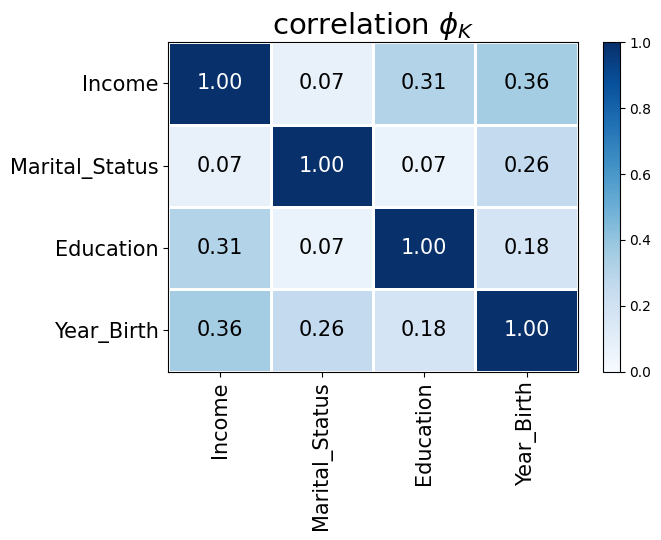

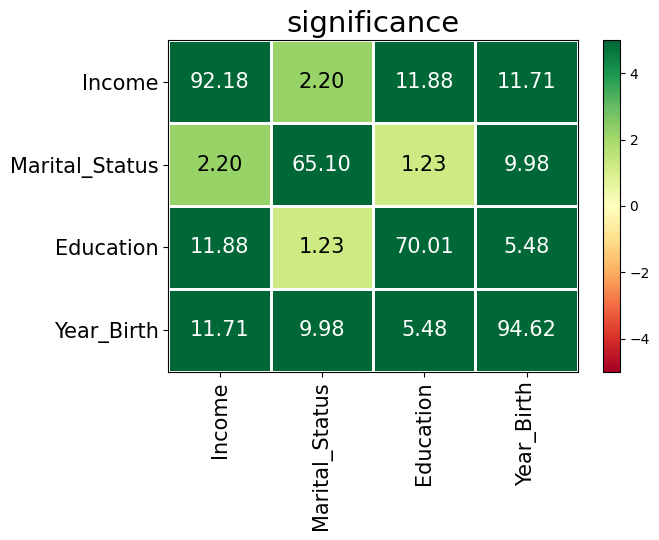

In [5]:
# correlation between Year_Birth, Education, Marital Status, and Income using phik correlation package

# import module
import phik
from phik.report import plot_correlation_matrix
from phik import report

# phik correlation
phik_overview = df.loc[~(df['Income'] > upperbound)][['Year_Birth','Education', 'Marital_Status', 'Income']].phik_matrix(interval_cols=['Year_Birth', 'Income'])

plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(7,5.5))

# significance between those columns
significance_overview = df.loc[~(df['Income'] > upperbound)][['Year_Birth','Education', 'Marital_Status', 'Income']].significance_matrix(interval_cols=['Year_Birth', 'Income'])

plot_correlation_matrix(significance_overview.fillna(0).values, x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, vmin=-5, vmax=5, title='significance', 
                        usetex=False, fontsize_factor=1.5, figsize=(7,5.5))

plt.tight_layout()

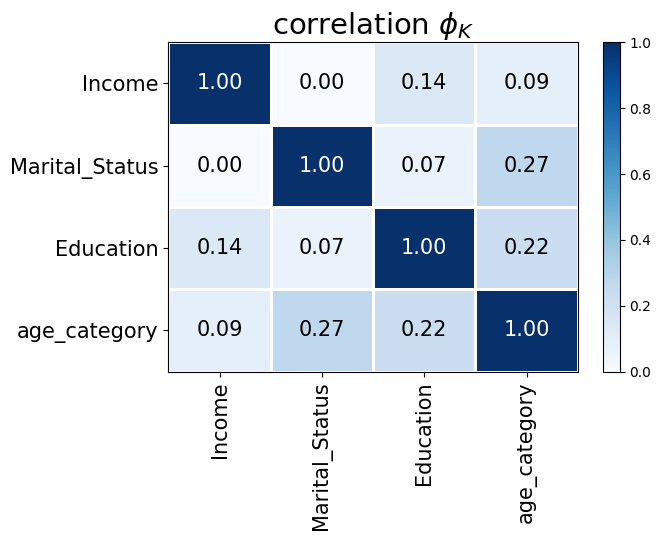

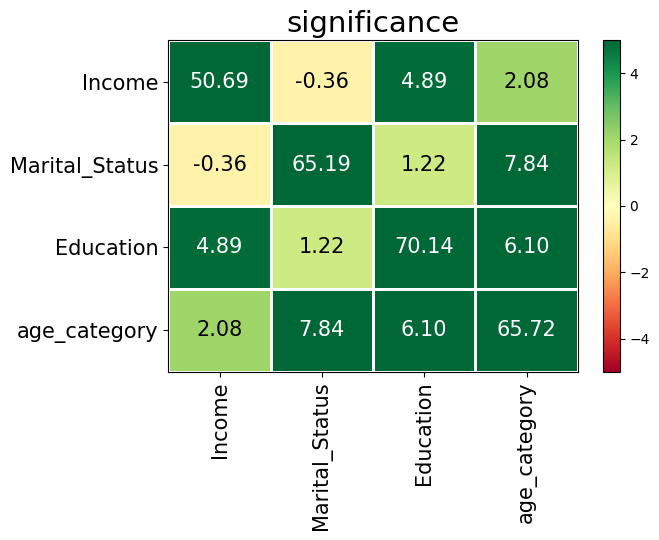

In [6]:
# correlation between Year_Birth, Education, Marital Status, and Income using phik correlation package

# import module
import phik
from phik.report import plot_correlation_matrix
from phik import report

# phik correlation
phik_overview = df[['age_category','Education', 'Marital_Status', 'Income']].phik_matrix(interval_cols=['Year_Birth', 'Income'])

plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(7,5.5))

# significance between those columns
significance_overview = df[['age_category','Education', 'Marital_Status', 'Income']].significance_matrix(interval_cols=['Year_Birth', 'Income'])

plot_correlation_matrix(significance_overview.fillna(0).values, x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, vmin=-5, vmax=5, title='significance', 
                        usetex=False, fontsize_factor=1.5, figsize=(7,5.5))

plt.tight_layout()

-------------------------------

----------------------

> ### make variable contains create a variable that contains column names based on the category in .pdf

In [7]:
people = ['ID', 'Year_Birth', 'age', 'age_category', 'Education', 'Marital_Status', 'Income', 'num_children', 'Dt_Customer', 'Recency', 'Complain']
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
promotion = ['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
place = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

In [8]:
# sns.distplot(df['age'], kde=True);
# plt.axvline(x=df['age'].mean(), c='red', label='mean')
# plt.axvline(x=df['age'].median(), c='b', label='median')
# plt.legend()

# from scipy.stats import shapiro

# # check the distribution
# stats, pvalue = shapiro(df['age'])
# # check the pvalue
# if pvalue > 0.05:
#         print(f"pvalue: {pvalue}. So, age has normal distribution")
# else:
#         print(f"pvalue: {pvalue}. So, age has NOT normal distribution")

> ### exploration in Place: NumWebPurchases, NumWebVisitsMonth, NumCatalogPurchases, NumStorePurchases.

<Axes: xlabel='MntWines'>

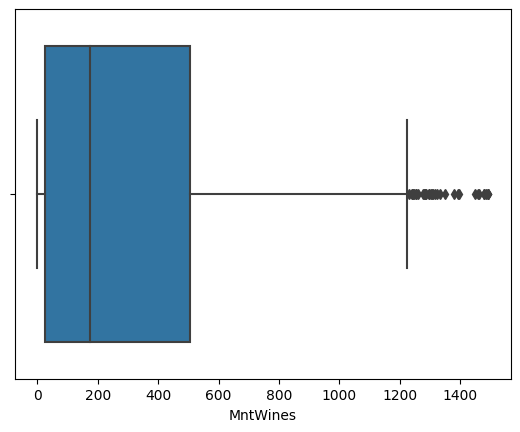

In [9]:
sns.boxplot(df, x='MntWines')

In [10]:
mntwines = fnc.checkquantiles(df, 'MntWines')
upperbound = mntwines[3] + (1.5 * (mntwines[3] - mntwines[1]))
df.loc[df['MntWines'] > upperbound]

NameError: name 'fnc' is not defined

In [ ]:
dftrial = df[['Marital_Status', 'Education', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].groupby(['Marital_Status','Education']).agg('sum').reset_index()
dftrial

,Marital_Status,Education,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,Divorced,Basic,0,1,3,10,6,9,1,0,3,8
1,Divorced,Graduation,35769,3929,19395,4472,3949,5839,495,332,697,636
2,Divorced,Master,19229,1316,8539,1854,1552,2885,267,147,341,343
3,Divorced,PhD,20366,1117,6911,1794,715,2006,237,141,309,286
4,Married,Basic,332,431,454,701,488,841,69,13,99,238
5,Married,Graduation,207331,21307,128290,30888,22354,36328,3003,1930,4230,3815
6,Married,Master,100620,9115,51945,13695,9500,15260,1480,915,2164,2005
7,Married,PhD,128427,6085,55640,7900,5879,9507,1347,962,1889,1628
8,Single,Basic,56,165,137,176,153,352,30,12,49,120
9,Single,Graduation,66347,8251,47554,11382,7418,12907,1007,688,1430,1339


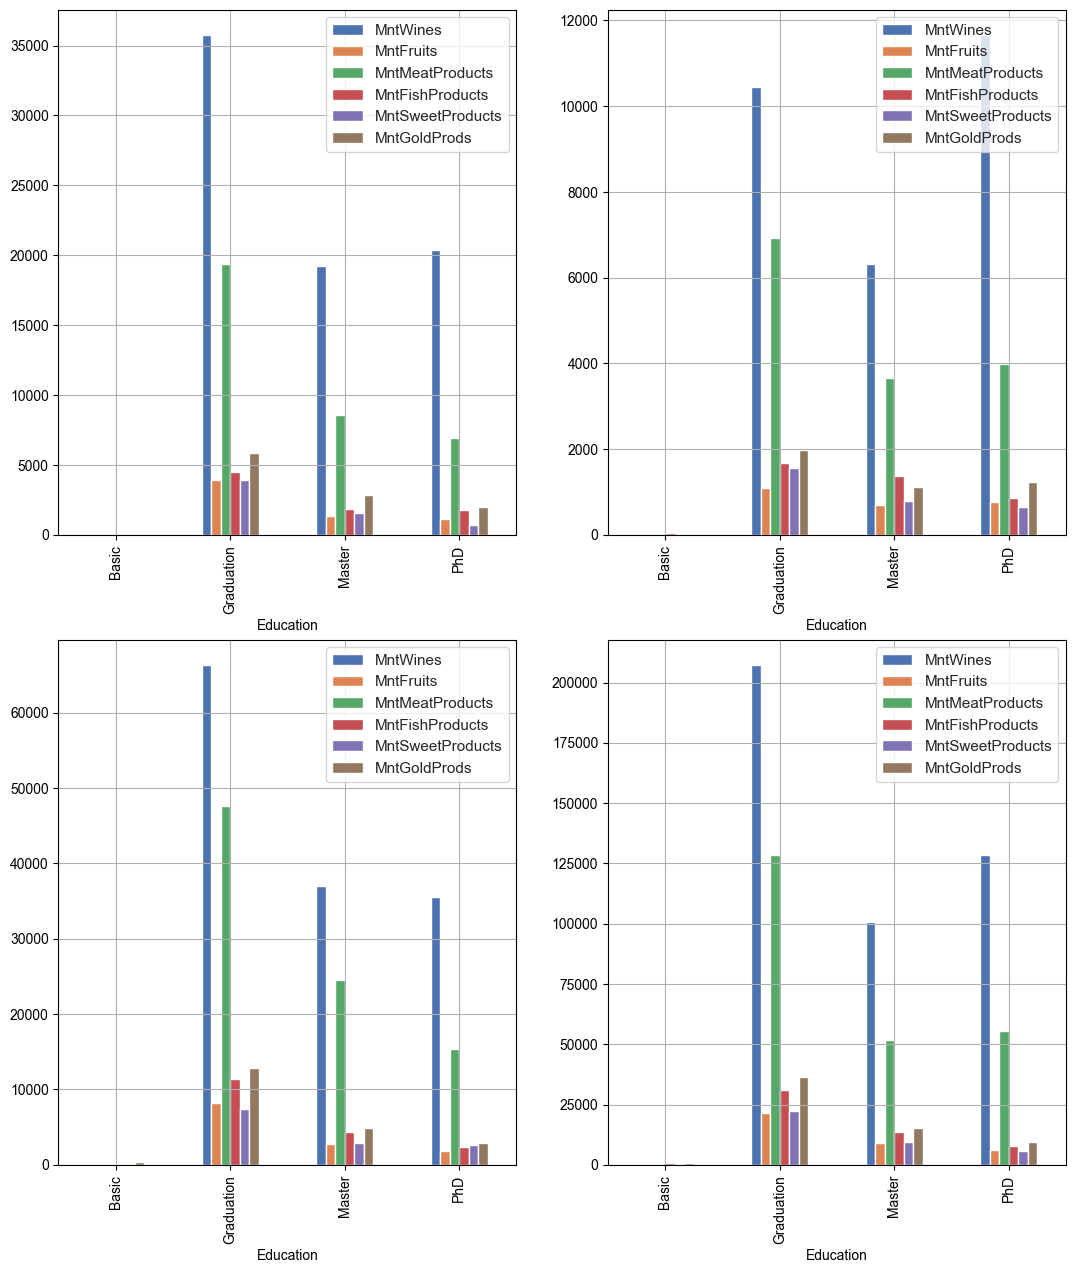

In [ ]:
dftrial_divorced = dftrial[['Marital_Status', 'Education', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]\
                    .query("Marital_Status == 'Divorced'")

dftrial_widow = dftrial[['Marital_Status', 'Education', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]\
                    .query("Marital_Status == 'Widow'")

dftrial_single = dftrial[['Marital_Status', 'Education', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]\
                    .query("Marital_Status == 'Single'")

dftrial_married = dftrial[['Marital_Status', 'Education', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]\
                    .query("Marital_Status == 'Married'")


fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(13,15))

rows1 = [ax1,ax2]
rows2 = [ax3,ax4]
dflist1 = [dftrial_divorced, dftrial_widow]
dflist2 = [dftrial_single, dftrial_married]
label1 = ['Divorced', 'Widow']
label2 = ['Single', 'Married']



for i in zip(dflist1, dflist2, rows1, rows2, label1, label2):
    sns.set_theme(style="whitegrid")
    i[0].plot(kind='bar',x='Education',ax=i[2],label=i[-2])
    i[1].plot(kind='bar',x='Education',ax=i[3],label=i[-1])

In [ ]:
df.query("Income < 700000")

,ID,Year_Birth,age,Education,Marital_Status,Income,num_children,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,age_category
0,5524,1957,55,Graduation,Single,58138.000000,0,2012-09-04,58,0,635,88,546,172,88,88,3,0,0,0,0,0,1,8,10,4,7,3,11,middle-aged adults
1,2174,1954,60,Graduation,Single,46344.000000,2,2014-03-08,38,0,11,1,6,2,1,6,2,0,0,0,0,0,0,1,1,2,5,3,11,old adults
2,4141,1965,48,Graduation,Married,71613.000000,0,2013-08-21,26,0,426,49,127,111,21,42,1,0,0,0,0,0,0,8,2,10,4,3,11,middle-aged adults
3,6182,1984,30,Graduation,Married,26646.000000,1,2014-02-10,26,0,11,4,20,10,3,5,2,0,0,0,0,0,0,2,0,4,6,3,11,adults
4,5324,1981,33,PhD,Married,58293.000000,1,2014-01-19,94,0,173,43,118,46,27,15,5,0,0,0,0,0,0,5,3,6,5,3,11,adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,5079,1971,42,Graduation,Married,42075.500000,2,2013-03-03,82,0,71,1,16,0,0,9,4,0,0,0,0,0,0,2,1,3,8,3,11,middle-aged adults
2236,10339,1954,59,Master,Married,52884.500000,1,2013-06-23,83,0,161,0,22,0,0,24,2,0,0,0,0,0,0,4,1,4,6,3,11,middle-aged adults
2237,3117,1955,58,Graduation,Single,59925.000000,1,2013-10-18,95,0,264,0,21,12,6,147,3,0,0,0,0,0,0,6,1,5,7,3,11,middle-aged adults
2238,5250,1943,70,Master,Widow,71335.500000,0,2013-10-30,75,0,532,126,490,164,126,126,1,0,0,0,0,1,1,5,5,11,1,3,11,old adults


<Axes: xlabel='Year_Birth', ylabel='Income'>

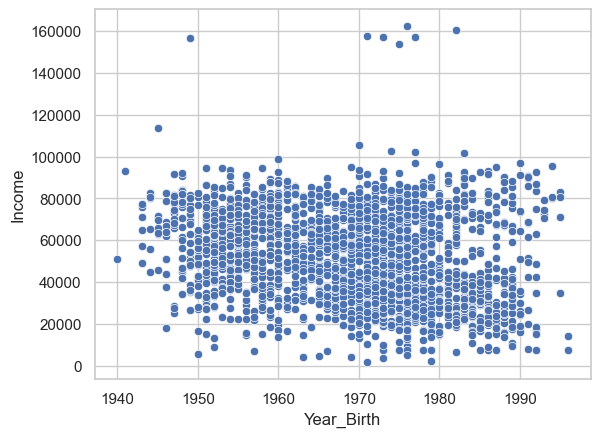

In [ ]:
sns.scatterplot(df.query("Income < 600000"), x='Year_Birth', y='Income')
# plt.ylim(700_000)

-----------------